In [17]:
# -*- coding: utf-8 -*-
"""
Spyder Editor

This is a temporary script file.
"""

# -*- coding: utf-8 -*-
"""
Created on Tue Apr  5 20:16:40 2022

@author: Rufus Sam A
"""

from keras.layers import Input, Lambda, Dense, Flatten, MaxPooling2D, Dropout, Conv2D, Activation, BatchNormalization
from keras.models import Model, Sequential
#from keras.applications.resnet50 import ResNet50
from keras.applications.resnet import ResNet50
#from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os
import numpy as np
#import cv2   
import os
import random
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = r'/content/drive/MyDrive/data-task1/data-task1/train'
valid_path = r'/content/drive/MyDrive/data-task1/data-task1/test'

#train_path = r'C:\Users\Computing\Downloads\data-task1\data-task1\data-task1\train'
#test_path = r'C:\Users\Computing\Downloads\data-task1\data-task1\data-task1\test'
CATEGORIES =['no_pneumonia','pneumonia']
IMG_SIZE = 150


In [18]:




def pre_pro(DIRECTORY):

  data = []
  #pre-processing
  for category in CATEGORIES:
        folder = os.path.join(DIRECTORY, category)
        label = CATEGORIES.index(category)
        for img in tqdm(os.listdir(folder)):
            try:
                img_path = os.path.join(folder, img)
                #print(img_path)
                #img_arr = cv2.imread(img_path)
                img_arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
                data.append([img_arr, label])
            except Exception as e:
                 pass
  len(data)

  random.shuffle(data)

  X = []
  Y = []
    
  for features, labels in data:
   X.append(features)
   Y.append(labels)
    

  X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
  y = np.array(Y)
  return X, y

In [ ]:


X_train,y_train = pre_pro(r'/content/drive/MyDrive/data-task1/data-task1/train')
X_test,y_test = pre_pro(r'/content/drive/MyDrive/data-task1/data-task1/test')
X_val,y_val= pre_pro(r'/content/drive/MyDrive/data-task1/data-task1/val')



In [3]:
import pickle
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import TensorBoard

In [50]:
import pickle
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import TensorBoard

X_train = pickle.load(open(r'C:\Users\Computing\Downloads\data-task1-20220514T230241Z-001\data-task1\data-task1\X_train.pkl','rb'))
y_train = pickle.load(open(r'C:\Users\Computing\Downloads\data-task1-20220514T230241Z-001\data-task1\data-task1\y_train.pkl','rb'))
X_test = pickle.load(open(r'C:\Users\Computing\Downloads\data-task1-20220514T230241Z-001\data-task1\data-task1\X_test.pkl','rb'))
y_test = pickle.load(open(r'C:\Users\Computing\Downloads\data-task1-20220514T230241Z-001\data-task1\data-task1\Y_test.pkl','rb'))
X_val = pickle.load(open(r'C:\Users\Computing\Downloads\data-task1-20220514T230241Z-001\data-task1\data-task1\X_val.pkl','rb'))
y_val = pickle.load(open(r'C:\Users\Computing\Downloads\data-task1-20220514T230241Z-001\data-task1\data-task1\y_val.pkl','rb'))

In [ ]:
#Dont run
'''
pickle.dump(X_train, open('/content/drive/MyDrive/data-task1/data-task1/X_train.pkl', 'wb'))
pickle.dump(y_train, open('/content/drive/MyDrive/data-task1/data-task1/y_train.pkl', 'wb'))
pickle.dump(X_test, open('/content/drive/MyDrive/data-task1/data-task1/X_test.pkl', 'wb'))
pickle.dump(y_test, open('/content/drive/MyDrive/data-task1/data-task1/Y_test.pkl', 'wb'))
pickle.dump(X_val, open('/content/drive/MyDrive/data-task1/data-task1/X_val.pkl', 'wb'))
pickle.dump(y_val, open('/content/drive/MyDrive/data-task1/data-task1/y_val.pkl', 'wb'))


In [54]:
X_trainShape = X_train.shape[1]*X_train.shape[2]*X_train.shape[3]
X_trainFlat = X_train.reshape(X_train.shape[0], X_trainShape)
Y_train = y_train
from imblearn.under_sampling import RandomUnderSampler
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE 
ros = RandomUnderSampler(sampling_strategy='auto')
X_trainRos, Y_trainRos = ros.fit_resample(X_trainFlat, Y_train)
Y_trainRosHot = to_categorical(Y_trainRos, num_classes = 2)
#X_valRos, Y_valRos = ros.fit_resample(X_valFlat, Y_val)
for i in range(len(X_trainRos)):
    height, width, channels = 150,150,3
    X_trainRosReshaped = X_trainRos.reshape(len(X_trainRos),height,width,channels)
Y_trainRosHot = to_categorical(Y_trainRos, num_classes = 2)

X_train = X_trainRosReshaped
y_train = Y_trainRosHot

In [23]:
X_valShape = X_val.shape[1]*X_val.shape[2]*X_val.shape[3]
X_valFlat = X_val.reshape(X_val.shape[0], X_valShape)
Y_val = y_val
from imblearn.over_sampling import SMOTE 
ros = SMOTE(sampling_strategy='minority')
X_valRos, Y_valRos = ros.fit_resample(X_valFlat, Y_val)
Y_valRosHot = to_categorical(Y_valRos, num_classes = 2)
#X_valRos, Y_valRos = ros.fit_resample(X_valFlat, Y_val)
for i in range(len(X_valRos)):
    height, width, channels = 150,150,3
    X_valRosReshaped = X_valRos.reshape(len(X_valRos),height,width,channels)
Y_valRosHot = to_categorical(Y_valRos, num_classes = 2)
X_val = X_valRosReshaped
y_val = Y_valRosHot

In [56]:
import tensorflow
from tensorflow.keras.utils import to_categorical
#y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)
y_val = to_categorical(y_val, 2)

In [55]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(1284, 150, 150, 3)
(1284, 2)
(500, 150, 150, 3)
(500,)
(500, 150, 150, 3)
(500,)


In [53]:
y_train.shape

(3000, 2)

In [38]:
X_train = X_train/ 255;
X_test = X_test/ 255;
X_val = X_val/ 255;



In [41]:
#weight_for_0 = (1 / 752)*(3500)/2.0 
#weight_for_1 = (1 / 2748)*(3500)/2.0

weight_for_0 = 0.65
weight_for_1 = 0.35

class_weight = {0: weight_for_0, 1: weight_for_1}

print(f"Weight for class 0: {weight_for_0:.2f}")
print(f"Weight for class 1: {weight_for_1:.2f}")

Weight for class 0: 0.65
Weight for class 1: 0.35


In [57]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255,featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False, # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = False,  # randomly flip images
        vertical_flip=False)

test_datagen = ImageDataGenerator(rescale = 1./255)

val_datagen = ImageDataGenerator(rescale = 1./255, zoom_range = 0.2)



In [58]:
train_datagen.fit(X_train)
test_datagen.fit(X_test)
val_datagen.fit(X_val)

In [60]:
from keras.layers import Activation, MaxPool2D, BatchNormalization, Dropout
from keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from keras import regularizers
model = Sequential()

model.add(Conv2D(128, (3, 3), padding='same',input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(16, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(BatchNormalization())
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

#model.add(Dropout(0.3))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(32))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

#early_stop = EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True)
#adam = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['acc'] )

In [61]:
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
sgd = tf.optimizers.SGD(lr=1e-6, momentum=0.9)

C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
X_val.shape

(500, 150, 150, 3)

In [ ]:
'''
X_a = np.asarray(X_train).astype('float32').reshape((-1,1))
X_b = np.asarray(X_val).astype('float32').reshape((-1,1))
'''

In [63]:
history = model.fit(X_train,y_train, validation_data=(X_val, y_val), epochs=25, batch_size=64, verbose=1 )
#class_weight=class_weight

#history = model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=2)


Epoch 1/25
21/21 [==============================] - 37s 2s/step - loss: 0.6962 - acc: 0.6223 - val_loss: 0.5640 - val_acc: 0.7580
Epoch 2/25
21/21 [==============================] - 37s 2s/step - loss: 0.6660 - acc: 0.6449 - val_loss: 0.5863 - val_acc: 0.7520
Epoch 3/25
21/21 [==============================] - 37s 2s/step - loss: 0.6612 - acc: 0.6480 - val_loss: 0.6152 - val_acc: 0.7240
Epoch 4/25
21/21 [==============================] - 37s 2s/step - loss: 0.6686 - acc: 0.6223 - val_loss: 0.6049 - val_acc: 0.7360
Epoch 5/25
21/21 [==============================] - 37s 2s/step - loss: 0.6669 - acc: 0.6371 - val_loss: 0.6116 - val_acc: 0.7080
Epoch 6/25
21/21 [==============================] - 37s 2s/step - loss: 0.6578 - acc: 0.6363 - val_loss: 0.6427 - val_acc: 0.6240
Epoch 7/25
21/21 [==============================] - 37s 2s/step - loss: 0.6466 - acc: 0.6550 - val_loss: 0.8962 - val_acc: 0.3440
Epoch 8/25
21/21 [==============================] - 37s 2s/step - loss: 0.6287 - acc: 0.65

In [ ]:
model.save(r'/content/drive/MyDrive/data-task1/high_loss_own_150_epoch.h5')

In [ ]:
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)

#pip install mlxtend


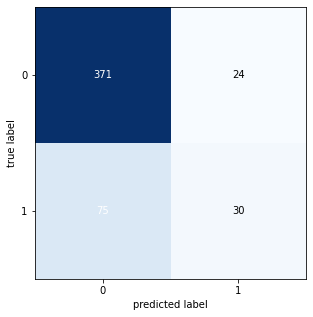

In [ ]:

CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

In [ ]:
from mlxtend.plotting import plot_confusion_matrix

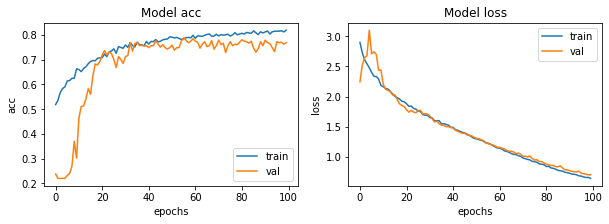

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['acc', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])
     
from sklearn.metrics import accuracy_score, confusion_matrix
preds = model.predict(X_test)
acc = accuracy_score(y_test, np.round(preds))*100
#cm = confusion_matrix(y_test, np.round(preds))

In [ ]:
tn, fp, fn, tp = CM.ravel()
preds = model.predict(X_test)
acc = accuracy_score(y_test, np.round(preds))*100
preds =model.predict(X_test)
from sklearn.metrics import accuracy_score
print('CONFUSION MATRIX ------------------')
print(CM)

print('\nTEST METRICS ----------------------')
precision = tp/(tp+fp)*100
recall = tp/(tp+fn)*100
print('Accuracy: {}%'.format(acc))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))

print('\nTRAIN METRIC ----------------------')
print('Train acc: {}'.format(np.round((history.history['acc'][-1])*100, 2)))

CONFUSION MATRIX ------------------
[[377  18]
 [ 85  20]]

TEST METRICS ----------------------
Accuracy: 79.4%
Precision: 52.63157894736842%
Recall: 19.047619047619047%
F1-score: 27.972027972027973

TRAIN METRIC ----------------------
Train acc: 81.87


In [ ]:
***end of categorical****

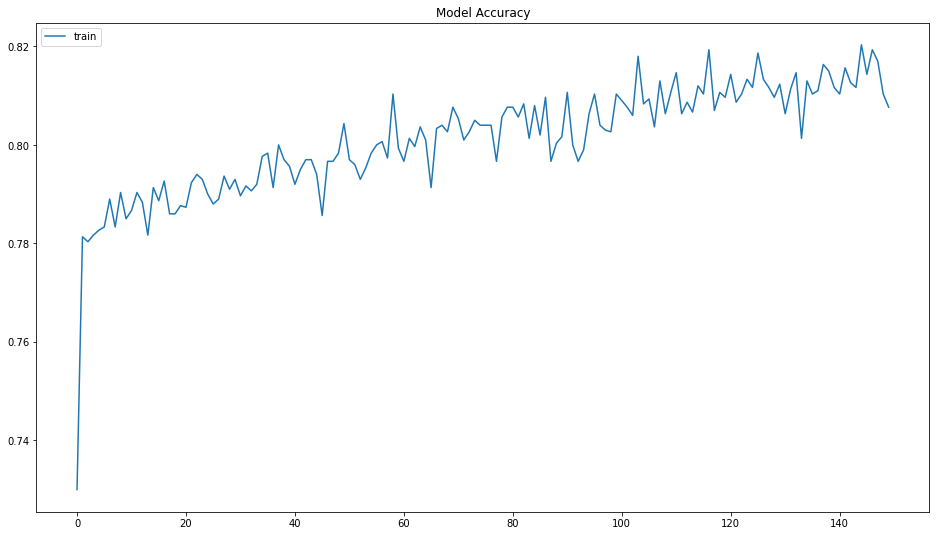

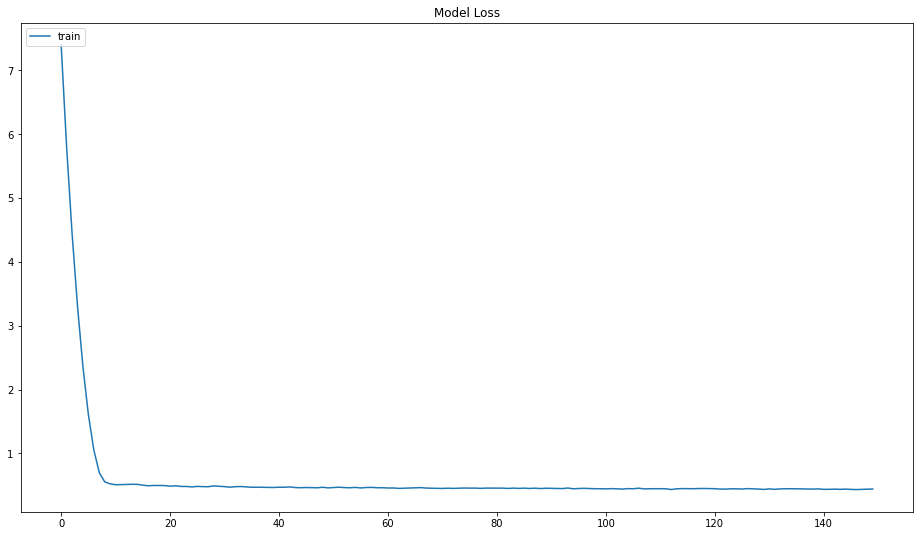

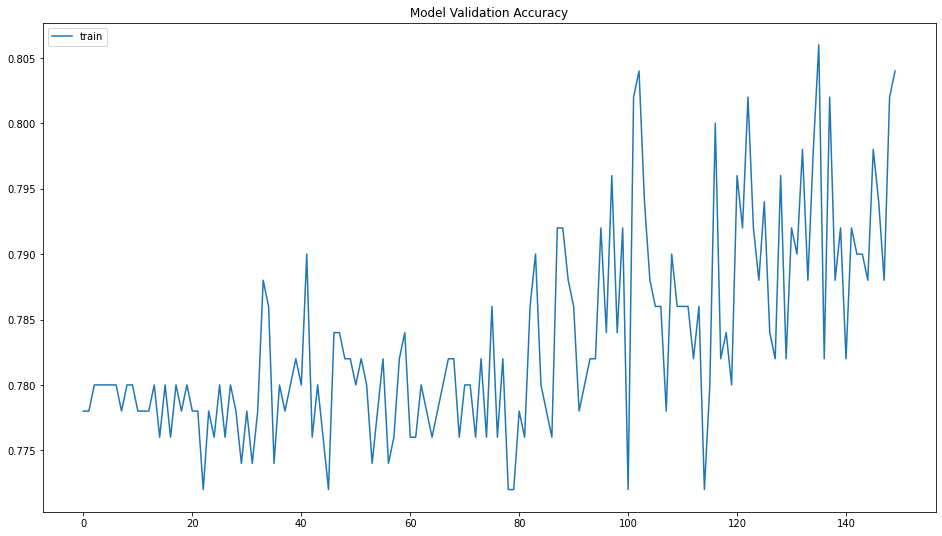

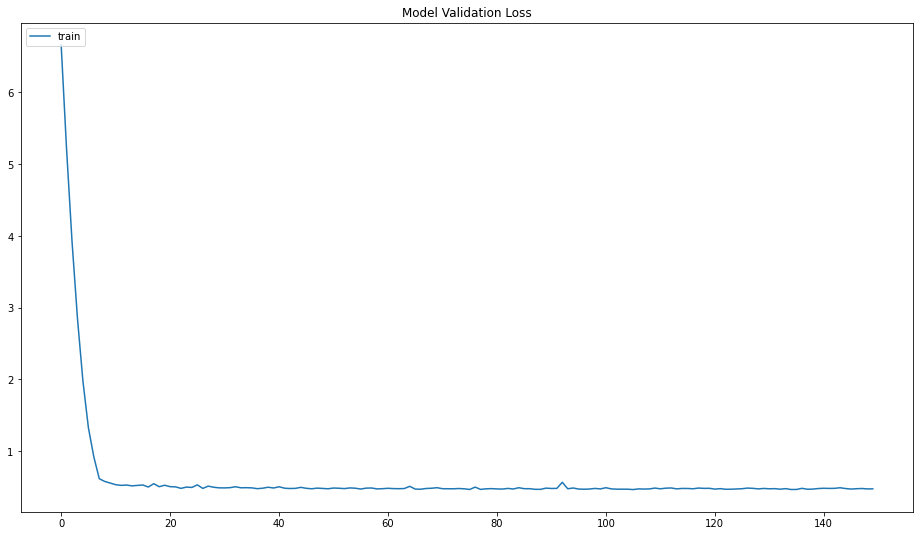

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(history.epoch, history.history['accuracy'])
plt.title('Model Accuracy')
plt.legend(['train'], loc='upper left')
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(history.epoch, history.history['loss'])
plt.title('Model Loss')
plt.legend(['train'], loc='upper left')
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(history.epoch, history.history['val_accuracy'])
plt.title('Model Validation Accuracy')
plt.legend(['train'], loc='upper left')
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(history.epoch, history.history['val_loss'])
plt.title('Model Validation Loss')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve, roc_curve, accuracy_score, confusion_matrix, precision_score, recall_score
pred = model.predict(X_train)
precisions, recalls, thresholds = precision_recall_curve(y_train, pred)
fpr, tpr, thresholds2 = roc_curve(y_train, pred)

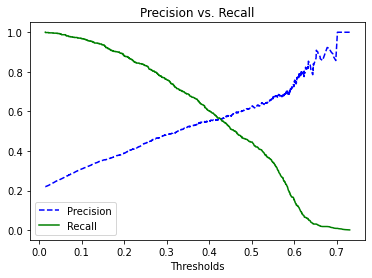

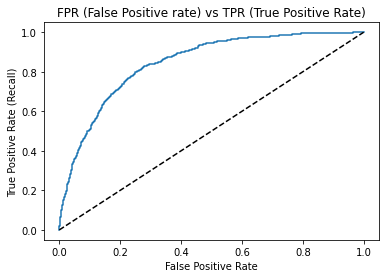

In [ ]:
def plot_precision_recall(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--')
    plt.plot(thresholds, recalls[:-1], 'g-')
    plt.title('Precision vs. Recall')
    plt.xlabel('Thresholds')
    plt.legend(['Precision', 'Recall'], loc='best')
    plt.show()

def plot_roc(fpr, tpr):
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('FPR (False Positive rate) vs TPR (True Positive Rate)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.show()
    
plot_precision_recall(precisions, recalls, thresholds)
plot_roc(fpr, tpr)

In [ ]:
predictions = model.predict(X_test)

binary_predictions = []
threshold = thresholds[np.argmax(precisions >= 0.50)]
for i in predictions:
    if i >= threshold:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0) 



In [ ]:
precisions[0]

0.22024013722126928

In [ ]:
print('Accuracy on testing set:', accuracy_score(binary_predictions, y_test)*100)
print('Precision on testing set:', precision_score(binary_predictions, y_test)*100)
print('Recall on testing set:', recall_score(binary_predictions, y_test)*100)

Accuracy on testing set: 75.4
Precision on testing set: 65.71428571428571
Recall on testing set: 44.230769230769226


[Text(0, 0.5, 'no_pneumonia'), Text(0, 1.5, 'pneumonia')]

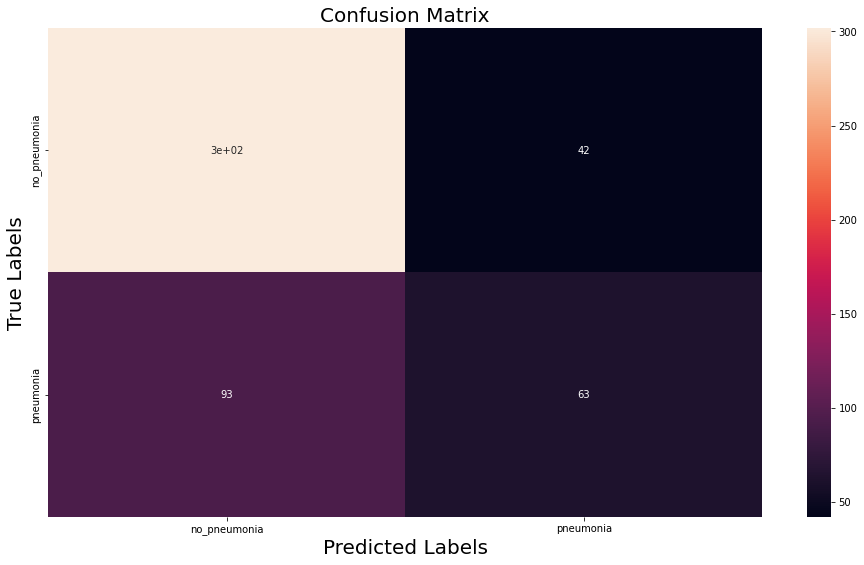

In [ ]:
import seaborn as sns 
matrix = confusion_matrix(binary_predictions, y_test)
plt.figure(figsize=(16, 9))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 
ax.xaxis.set_ticklabels(CATEGORIES)
ax.yaxis.set_ticklabels(CATEGORIES)

#This is the oneeeeeeeeeee

In [ ]:
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
pred = np.argmax(pred) 
y_true = np.argmax(y_test)

In [ ]:
res = tf.math.confusion_matrix(y_true,pred)

ValueError: ignored

In [ ]:
CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

TypeError: ignored

In [ ]:
'''
img_path = r'/content/drive/MyDrive/data-task1/data-task1/test yp/5.png'
img_arr = cv2.imread(img_path)
img = cv2.resize(img_arr, (150, 150))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
x = image.img_to_array(img)
x= x/255
x = np.expand_dims(x, axis=0)


In [ ]:
model.save(r'/content/drive/MyDrive/data-task1/data-task1/loop_model.h5')

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/data-task1/data-task1/loop_pne_model.h5')


In [ ]:
    score = model.evaluate(X_test,y_test,verbose=0)
    print('\nKeras CNN - accuracy:', score[1], '\n')
    


Keras CNN - accuracy: 0.7799999713897705 



In [ ]:
#2->>>>>>
import matplotlib.pyplot as plt

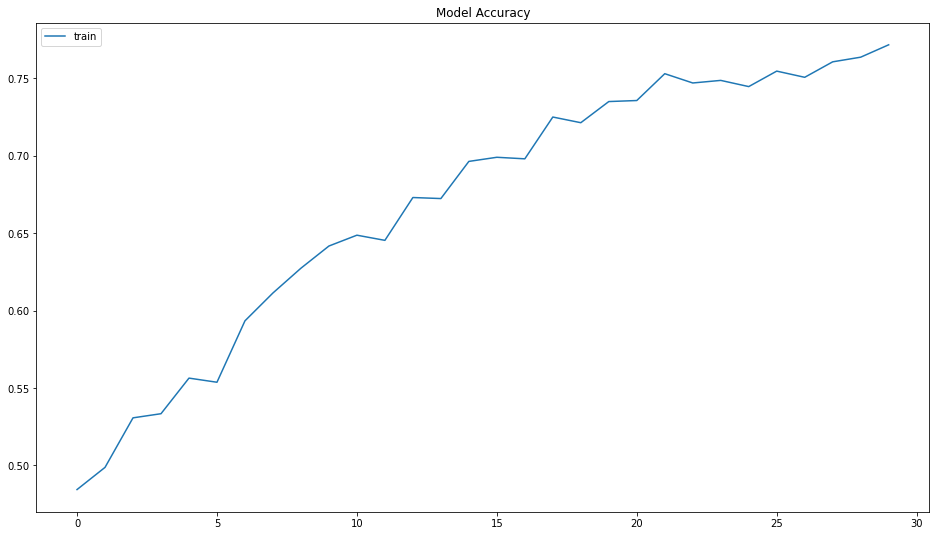

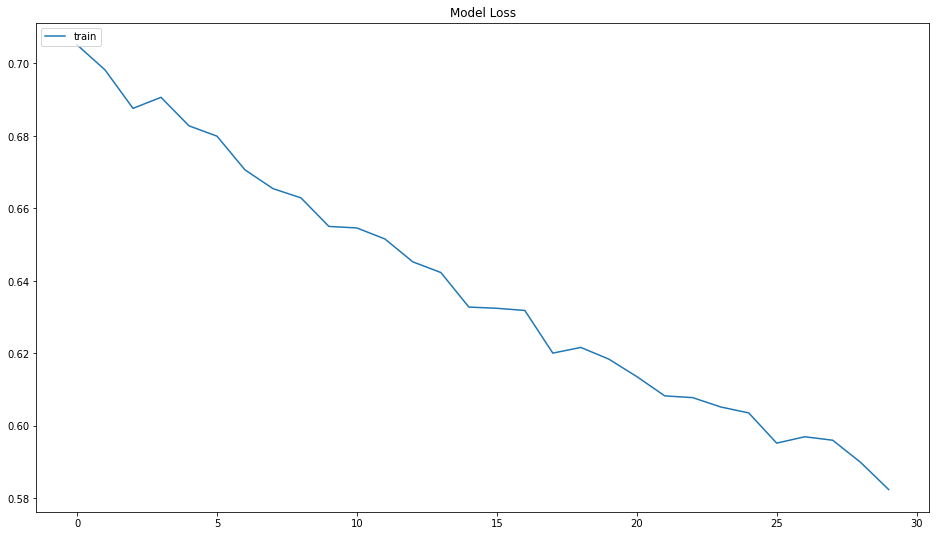

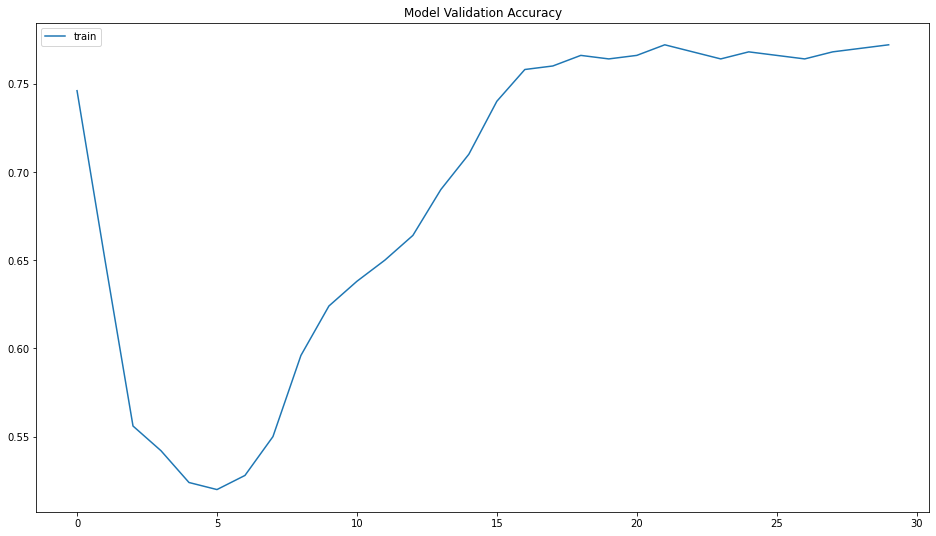

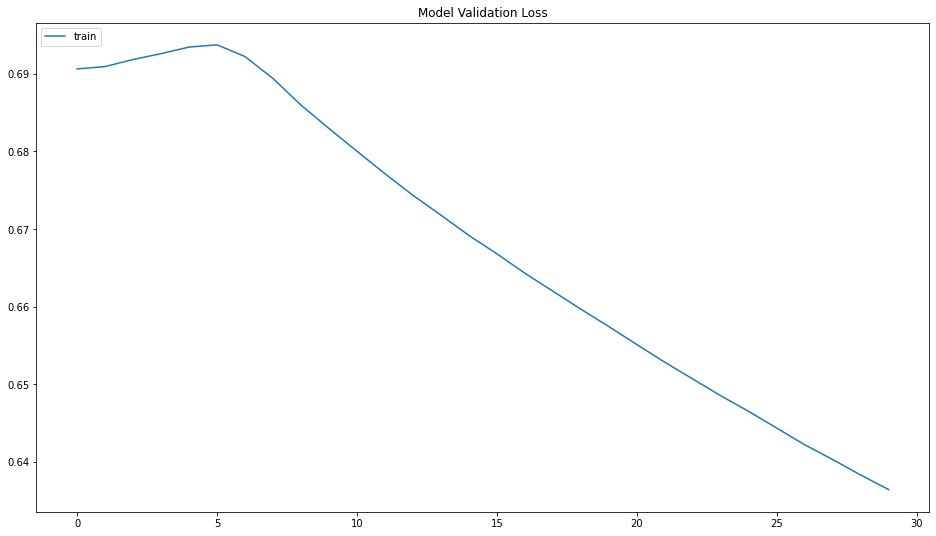

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(history.epoch, history.history['accuracy'])
plt.title('Model Accuracy')
plt.legend(['train'], loc='upper left')
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(history.epoch, history.history['loss'])
plt.title('Model Loss')
plt.legend(['train'], loc='upper left')
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(history.epoch, history.history['val_accuracy'])
plt.title('Model Validation Accuracy')
plt.legend(['train'], loc='upper left')
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(history.epoch, history.history['val_loss'])
plt.title('Model Validation Loss')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
import sklearn
import numpy as np
from sklearn.metrics import precision_recall_curve, roc_curve, accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [ ]:
pred = model.predict(X_train)
precisions, recalls, thresholds = precision_recall_curve(y_train, pred)
fpr, tpr, thresholds2 = roc_curve(y_train, pred)



In [ ]:
y_train.shape

(3000,)

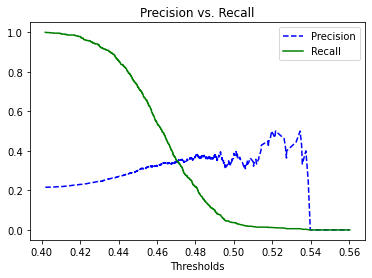

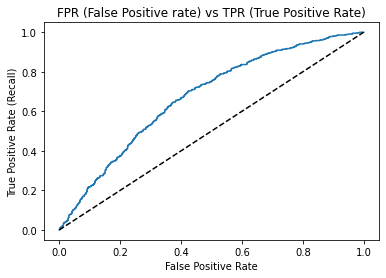

In [ ]:
def plot_precision_recall(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--')
    plt.plot(thresholds, recalls[:-1], 'g-')
    plt.title('Precision vs. Recall')
    plt.xlabel('Thresholds')
    plt.legend(['Precision', 'Recall'], loc='best')
    plt.show()

def plot_roc(fpr, tpr):
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('FPR (False Positive rate) vs TPR (True Positive Rate)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.show()
    
plot_precision_recall(precisions, recalls, thresholds)
plot_roc(fpr, tpr)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
#1->>>>>>
from sklearn.metrics import accuracy_score, confusion_matrix

preds = model.predict(X_test)

acc = accuracy_score(y_test, np.round(preds))*100
cm = confusion_matrix(y_test, np.round(preds))
tn, fp, fn, tp = cm.ravel()

print('CONFUSION MATRIX ------------------')
print(cm)

print('\nTEST METRICS ----------------------')
precision = tp/(tp+fp)*100
recall = tp/(tp+fn)*100
print('Accuracy: {}%'.format(acc))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))

print('\nTRAIN METRIC ----------------------')
print('Train acc: {}'.format(np.round((history.history['accuracy'][-1])*100, 2)))

CONFUSION MATRIX ------------------
[[362  33]
 [ 67  38]]

TEST METRICS ----------------------
Accuracy: 80.0%
Precision: 53.52112676056338%
Recall: 36.19047619047619%
F1-score: 43.18181818181818

TRAIN METRIC ----------------------


KeyError: ignored

In [ ]:
tn

389

In [ ]:
fn

105

In [ ]:
y_test.shape

(500,)

In [ ]:
X_test.shape

(500, 150, 150, 1)

In [ ]:
binary_predictions = []
threshold = thresholds[np.argmax(precisions >= 0.80)]
for i in predictions:
    if i >= threshold:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0) 



IndexError: ignored

In [ ]:
    y_pred

In [ ]:
 print('\n', sklearn.metrics.classification_report(np.where(y_test > 0)[1], np.argmax(y_pred, axis=1), target_names=list(labels.values())), sep='') 
Y_pred_classes = np.argmax(y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plotKerasLearningCurve()
plt.show()
plot_learning_curve(history)
plt.show()
plot_confusion_matrix(confusion_mtx, classes = list(labels.values()))
plt.show()

IndentationError: ignored

In [ ]:
x.shape

(1, 150, 150, 1)

In [ ]:
result = model.predict(x)
result

array([[0.42210358]], dtype=float32)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [ ]:
plot_confusion_matrix(X_val, y_val)

In [ ]:
preds.shape

(500, 1)

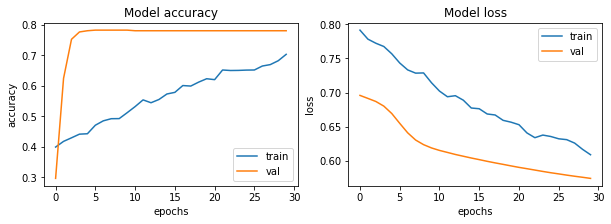

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
preds = model.predict(X_test)
acc = accuracy_score(y_test, np.round(preds))*100
cm = confusion_matrix(y_test, np.round(preds))
tn, fp, fn, tp = cm.ravel()

print('CONFUSION MATRIX ------------------')
print(cm)

print('\nTEST METRICS ----------------------')
precision = tp/(tp+fp)*100
recall = tp/(tp+fn)*100
print('Accuracy: {}%'.format(acc))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))

print('\nTRAIN METRIC ----------------------')
#print('Train acc: {}'.format(np.round((hist.history['acc'][-1])*100, 2)))

CONFUSION MATRIX ------------------
[[395   0]
 [105   0]]

TEST METRICS ----------------------
Accuracy: 79.0%
Precision: nan%
Recall: 0.0%
F1-score: nan

TRAIN METRIC ----------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in long_scalars
  # Remove the CWD from sys.path while we load stuff.
